# Hilda Beltrán Acosta

### A01251916

### Workshop 3

### August 22nd, 2023

# CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN?

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf

In [4]:
# Collect monthly data of AMD and Intel
sprices = yf.download(tickers=['AMD','INTC'], start="2017-01-01", end="2022-08-15",interval="1mo")
sprices = sprices['Adj Close']
sprices

[*********************100%%**********************]  2 of 2 completed


,AMD,INTC
Date,,
2017-01-01,10.370000,30.562122
2017-02-01,14.460000,30.047504
2017-03-01,14.550000,30.153336
2017-04-01,13.300000,30.220209
2017-05-01,11.190000,30.186771
...,...,...
2022-04-01,85.519997,41.417545
2022-05-01,101.860001,42.206181
2022-06-01,76.470001,35.826523


In [5]:
# Calculating cc returns from the DataFrame of sprices
sr = np.log(sprices) - np.log(sprices.shift(1))
# Drop the NaN values from the first months, since we can't calculate returns for the first month
sr=sr.dropna()

H0: AMD and Intel have the same monthly returns.


Ha: AMD has a greater monthly return than Intel.

In [6]:
# Calculate standard error
N = sr['AMD'].count()
amdvar = sr['AMD'].var()
intelvar = sr['INTC'].var()
sediff = np.sqrt((1/N) * (amdvar + intelvar ))

In [7]:
# Calculating the t-statistics
t = (sr['AMD'].mean() - sr['INTC'].mean()) / sediff
t

1.426007828899279

In [8]:
from scipy import stats as st
# Calculate the pvalue from the t-statistics calculated before
df = ( ((N-1) / N**2) * (amdvar + intelvar)**2  / ( (amdvar/N)**2 + (intelvar/N)**2  ))
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.15718173627210258

In [9]:
# This is another way of rejecting or supporting a hypothesis
st.ttest_ind(sr['AMD'],sr['INTC'],equal_var=False)

Ttest_indResult(statistic=1.426007828899279, pvalue=0.15718173627210258)

SINCE THE T-STATISTICS IS LESS THAN 2, WE REJECT THE ALTERNATIVE HYPOTHESIS AND SUPPORT THE NULL HYPOTHESIS.

In [10]:
!pip install researchpy

In [11]:
# Import library
import researchpy as rp
# This is another way of rejecting or supporting a hypothesis
rp.ttest(sr['AMD'],sr['INTC'],equal_variances=False)

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0       AMD   67.0  0.031376  0.162913  0.019903  -0.008361  0.071114
 1      INTC   67.0  0.000003  0.076738  0.009375  -0.018715  0.018721
 2  combined  134.0  0.015690  0.127831  0.011043  -0.006153  0.037532,
          Satterthwaite t-test  results
 0  Difference (AMD - INTC) =    0.0314
 1       Degrees of freedom =   93.9136
 2                        t =    1.4260
 3    Two side test p value =    0.1572
 4   Difference < 0 p value =    0.9214
 5   Difference > 0 p value =    0.0786
 6                Cohen's d =    0.2464
 7                Hedge's g =    0.2450
 8           Glass's delta1 =    0.1926
 9         Point-Biserial r =    0.1456)

# MEASURES OF LINEAR RELATIONSHIP

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

In [13]:
# Download data from prices in Microsoft and the S&P500 index
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
adjprices = prices['Adj Close'].dropna()

[*********************100%%**********************]  2 of 2 completed


<Figure size 640x480 with 0 Axes>

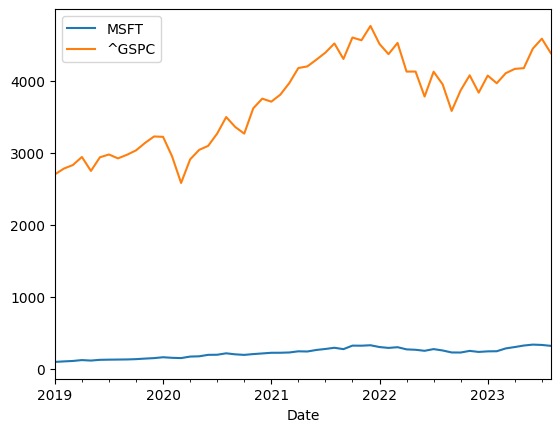

In [14]:
# Clean the figure before plotting
plt.clf()
# Plot both variables
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [15]:
# Calculate the growth factor, dividing it by the first month in each
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 640x480 with 0 Axes>

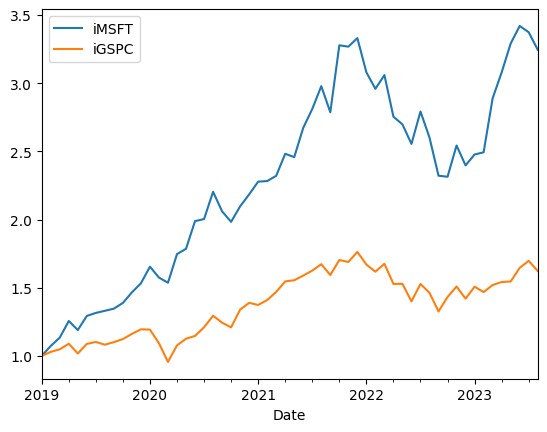

In [16]:
# Clean the figure before plotting
plt.clf()
# Plot the data
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [17]:
# Calculate the cc returns of the data frame adjprices
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Drop the first NaN values, since we can't calculate the returns of the first month
r = r.dropna()
r = r[['MSFT','^GSPC']]
r.columns = ['MSFT','GSPC']
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083539,0.066658


<Figure size 640x480 with 0 Axes>

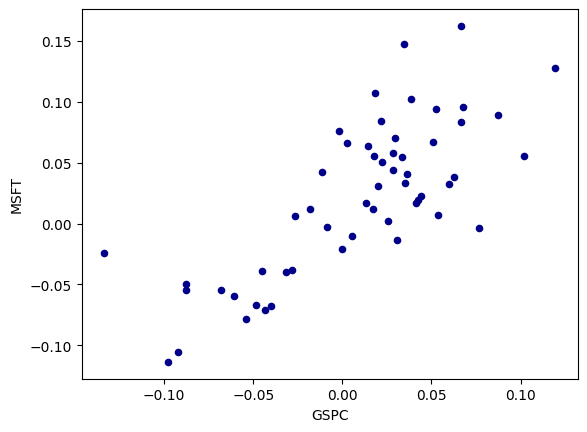

In [18]:
# Clean the figure before plotting
plt.clf()
# Scatter plot to find possible linear regression
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 640x480 with 0 Axes>

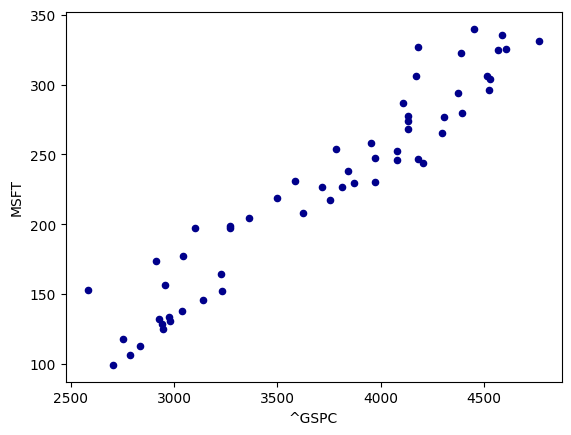

In [19]:
# Clean figure before plotting
plt.clf()
# Plot the relationship between ^GSPC and MSFT
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 640x480 with 0 Axes>

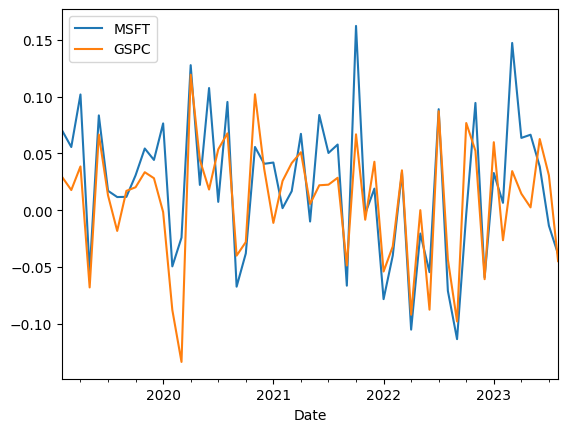

In [20]:
# Clean figure before plotting
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

# CALCULATING COVARIANCE AND CORRELATION

In [22]:
# Manually calculating covariance
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()
cov = sum_of_prod / (N-1)
cov

0.002585176132536688

In [23]:
# NumPy's function to calculate covariance
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00395758, 0.00258518],
       [0.00258518, 0.00287777]])

In [24]:
# Covariance between MSFT and GSPC
cov = covm[0,1]
cov

0.002585176132536688

In [25]:
# NumPy function to calculate the correlation matrix
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.76603347],
       [0.76603347, 1.        ]])

In [26]:
# Manually calculate the correlation with the covariance calculated before
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.766033468756562

In [27]:
from scipy.stats import pearsonr
# Pearson function to calculate correlation and the pvalue
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

PearsonRResult(statistic=0.7660334687565623, pvalue=9.465701171595252e-12)

THE PVALUE IS ALMOST ZERO, MSFT AND GSPC RETURNS HAVE A POSITIVE AND VERY SIGNIFICANT CORRELATION (AT THE 99.9999% CONFIDENCE LEVEL).